In [15]:
## 读入数据
import pandas as pd 

cnPapers = pd.read_excel("zy.xlsx",names=["report"])
cnPapers.head()

,report
0,《关于扩大当前农业农村基础设施建设投资的工作方案》印发\n发布人：裴文超来源：农业农村部官网...
1,标 题： 中国人民银行 国家金融监督管理总局 证监会 财政部 农业农村部关于金融支持全面推...
2,07B250303202300241\n信息所属单位\n农村社会事业促进司\n信息名称\n中...
3,题： 体育总局 中央文明办 发展改革委 教育部 国家民委 财政部 住房城乡建设部 农业农...
4,题： 人力资源社会保障部 国家发展改革委 财政部 农业农村部 国家乡村振兴局关于进一步支...


In [17]:
import warnings
warnings.filterwarnings("ignore")

import jieba 

jieba.load_userdict("cidian.txt")

cnStopLists = list(pd.read_csv("stop.txt",names = ["w"],sep="\t",encoding="utf-8").w)

def cnPaperCut(text):
    return [w for w in jieba.cut(text) if w not in cnStopLists and len(w)>1]

In [18]:
## 中文分词

cnWordLists = [cnPaperCut(paper) for paper in cnPapers.report]
cnWordLists[1]

['中国人民银行',
 '金融',
 '监督管理',
 '证监会',
 '农业',
 '金融',
 '乡村',
 '振兴',
 '农业',
 '强国',
 '发文',
 '中国人民银行',
 '金融监管',
 '中国证监会',
 '农业',
 '文字',
 '银发',
 '2023',
 '97',
 '中国人民银行',
 '网站',
 '主题',
 '农业',
 '林业',
 '水利',
 '农业',
 '畜牧业',
 '渔业',
 '公文',
 '种类',
 '2023',
 '06',
 '16',
 '中国人民银行',
 '金融',
 '监督管理',
 '证监会',
 '农业',
 '金融',
 '乡村',
 '振兴',
 '农业',
 '强国',
 '银发',
 '2023',
 '97',
 '贯彻',
 '经济',
 '农村',
 '精神',
 '贯彻',
 '理念',
 '供给',
 '保障',
 '科技',
 '装备',
 '经营',
 '产业',
 '韧性',
 '竞争能力',
 '强且',
 '特色',
 '农业',
 '强国',
 '目标',
 '锚定',
 '目标',
 '鼓足干劲',
 '多层次',
 '广覆盖',
 '农村',
 '金融服务',
 '金融服务',
 '能力',
 '乡村',
 '振兴',
 '农业',
 '强国',
 '粮食',
 '农产品',
 '稳产',
 '金融服务',
 '粮食',
 '农产品',
 '生产',
 '金融',
 '亿斤',
 '粮食',
 '产能',
 '玉米',
 '单产',
 '吨粮田',
 '粮食',
 '生产',
 '产能',
 '设备',
 '技术升级',
 '融资',
 '粮食',
 '稳产',
 '增产',
 '大豆',
 '油料',
 '生产',
 '生猪',
 '菜篮子',
 '油茶',
 '扩种',
 '低产',
 '低效',
 '信贷',
 '投放',
 '化肥',
 '农药',
 '农资',
 '生产',
 '购销',
 '切入点',
 '农资',
 '企业',
 '经营',
 '农业',
 '生产',
 '农资',
 '采购',
 '周转资金',
 '粮食',
 '农产品',
 '生产',
 '托管',
 '综合',
 '金融保险',
 '服务',
 '模式',
 '农产

In [19]:
from gensim.corpora import Dictionary
# 构建词篇矩阵
cnDict = Dictionary(cnWordLists)
cnCorpus = [cnDict.doc2bow(text) for text in cnWordLists]

cnCorpus[1]

[(11, 1),
 (17, 2),
 (18, 4),
 (21, 1),
 (27, 2),
 (29, 9),
 (32, 14),
 (33, 3),
 (34, 2),
 (41, 14),
 (42, 9),
 (45, 2),
 (46, 7),
 (49, 18),
 (50, 6),
 (53, 26),
 (56, 2),
 (58, 1),
 (61, 3),
 (64, 43),
 (65, 14),
 (67, 29),
 (69, 4),
 (74, 1),
 (75, 2),
 (82, 16),
 (92, 1),
 (99, 4),
 (100, 2),
 (104, 1),
 (108, 4),
 (110, 4),
 (112, 7),
 (113, 6),
 (117, 1),
 (118, 1),
 (124, 1),
 (128, 1),
 (129, 2),
 (134, 1),
 (138, 1),
 (143, 5),
 (146, 3),
 (149, 2),
 (151, 1),
 (155, 1),
 (162, 2),
 (163, 1),
 (169, 1),
 (170, 1),
 (171, 1),
 (176, 6),
 (177, 1),
 (178, 1),
 (179, 3),
 (192, 1),
 (196, 1),
 (198, 3),
 (200, 6),
 (201, 1),
 (207, 1),
 (208, 1),
 (209, 1),
 (211, 1),
 (212, 1),
 (218, 1),
 (220, 16),
 (221, 3),
 (223, 10),
 (225, 1),
 (229, 2),
 (230, 1),
 (232, 1),
 (235, 1),
 (236, 9),
 (238, 1),
 (243, 2),
 (247, 1),
 (250, 1),
 (263, 1),
 (264, 1),
 (266, 1),
 (275, 3),
 (276, 1),
 (281, 1),
 (284, 1),
 (285, 4),
 (287, 9),
 (290, 3),
 (292, 1),
 (293, 10),
 (295, 1),
 (300

In [24]:
from gensim.models import TfidfModel
# 进行TF-IDF计算

cn_tfidf_model = TfidfModel(cnCorpus)

cn_corpus_tfidf = cn_tfidf_model[cnCorpus]

cn_corpus_tfidf[1]

[(11, 0.024416839345777822),
 (17, 0.04540487569806521),
 (18, 0.09080975139613041),
 (21, 0.02130166983214136),
 (27, 0.02660045657596641),
 (29, 0.006806794391283902),
 (32, 0.027996400651405025),
 (33, 0.01550100130858345),
 (34, 0.01893300486590162),
 (41, 0.013089886252342304),
 (42, 0.017997686133046087),
 (45, 0.0295838397819723),
 (46, 0.015471735610792188),
 (49, 0.12107133854867841),
 (50, 0.001463542609848999),
 (53, 0.13030638343271542),
 (56, 0.03195250474821204),
 (58, 0.024416839345777822),
 (61, 0.012015299848846736),
 (65, 0.016954781565228914),
 (67, 0.0023330647456728327),
 (69, 0.02397568723602919),
 (74, 0.010977818448557986),
 (75, 0.012341098410472184),
 (82, 0.00657521714600871),
 (92, 0.002763216984985211),
 (99, 0.0105975734876501),
 (100, 0.005074462953772384),
 (104, 0.007752100936205593),
 (108, 0.007998971614687149),
 (110, 0.005221305500645255),
 (112, 0.030943471221584386),
 (113, 0.06586691069134792),
 (117, 0.015361287984452554),
 (118, 0.0069207010127

In [20]:
cnDict.token2id

{'05': 0,
 '10': 1,
 '11%': 2,
 '12': 3,
 '20%': 4,
 '21': 5,
 '30': 6,
 '52%': 7,
 '54%': 8,
 '一到': 9,
 '一区': 10,
 '一对一': 11,
 '一是': 12,
 '三江平原': 13,
 '三要': 14,
 '上行': 15,
 '不折不扣': 16,
 '业务范围': 17,
 '中国人民银行': 18,
 '中国银行': 19,
 '中型': 20,
 '中小型': 21,
 '主产区': 22,
 '事关': 23,
 '二要': 24,
 '五是': 25,
 '亟须': 26,
 '交易': 27,
 '交易中心': 28,
 '产业': 29,
 '产出': 30,
 '产后': 31,
 '产品': 32,
 '产地': 33,
 '产能': 34,
 '人工': 35,
 '仅为': 36,
 '今冬': 37,
 '今年底': 38,
 '仓储': 39,
 '以省': 40,
 '企业': 41,
 '优化': 42,
 '低洼地': 43,
 '低温': 44,
 '供水': 45,
 '供给': 46,
 '依规': 47,
 '保护色': 48,
 '保险': 49,
 '保障': 50,
 '保鲜': 51,
 '信息化': 52,
 '信贷': 53,
 '信贷资金': 54,
 '修复': 55,
 '债务': 56,
 '偏小': 57,
 '偿还': 58,
 '典型性': 59,
 '养护': 60,
 '养殖': 61,
 '养殖场': 62,
 '内陆': 63,
 '农业': 64,
 '农产品': 65,
 '农垦': 66,
 '农村': 67,
 '农渠': 68,
 '农田': 69,
 '农田水利': 70,
 '农田灌溉': 71,
 '农电': 72,
 '农闲': 73,
 '冷藏': 74,
 '冷链': 75,
 '减损': 76,
 '减灾': 77,
 '减轻': 78,
 '分片': 79,
 '分项': 80,
 '列出': 81,
 '创新': 82,
 '利用': 83,
 '利用率': 84,
 '到位': 85,
 '加工能力': 86,
 '加快进度': 87,
 '务

In [25]:
from gensim.corpora import Dictionary
# 构建词篇矩阵
cnDict = Dictionary(cnWordLists)
cnCorpus = [cnDict.doc2bow(text) for text in cnWordLists]

cnCorpus[1]

[(11, 1),
 (17, 2),
 (18, 4),
 (21, 1),
 (27, 2),
 (29, 9),
 (32, 14),
 (33, 3),
 (34, 2),
 (41, 14),
 (42, 9),
 (45, 2),
 (46, 7),
 (49, 18),
 (50, 6),
 (53, 26),
 (56, 2),
 (58, 1),
 (61, 3),
 (64, 43),
 (65, 14),
 (67, 29),
 (69, 4),
 (74, 1),
 (75, 2),
 (82, 16),
 (92, 1),
 (99, 4),
 (100, 2),
 (104, 1),
 (108, 4),
 (110, 4),
 (112, 7),
 (113, 6),
 (117, 1),
 (118, 1),
 (124, 1),
 (128, 1),
 (129, 2),
 (134, 1),
 (138, 1),
 (143, 5),
 (146, 3),
 (149, 2),
 (151, 1),
 (155, 1),
 (162, 2),
 (163, 1),
 (169, 1),
 (170, 1),
 (171, 1),
 (176, 6),
 (177, 1),
 (178, 1),
 (179, 3),
 (192, 1),
 (196, 1),
 (198, 3),
 (200, 6),
 (201, 1),
 (207, 1),
 (208, 1),
 (209, 1),
 (211, 1),
 (212, 1),
 (218, 1),
 (220, 16),
 (221, 3),
 (223, 10),
 (225, 1),
 (229, 2),
 (230, 1),
 (232, 1),
 (235, 1),
 (236, 9),
 (238, 1),
 (243, 2),
 (247, 1),
 (250, 1),
 (263, 1),
 (264, 1),
 (266, 1),
 (275, 3),
 (276, 1),
 (281, 1),
 (284, 1),
 (285, 4),
 (287, 9),
 (290, 3),
 (292, 1),
 (293, 10),
 (295, 1),
 (300

# LDA建模

In [26]:
from gensim.models.ldamodel import LdaModel
## 困惑度计算
## Lower the perplexity better the model

def cal_perplexity(num_topics,corpus_tfidf, dict):
    ## random_state保证了结果的可复现性
    ldamodel = LdaModel(corpus_tfidf, num_topics=num_topics, id2word = dict,alpha= 50/num_topics, eta=0.01, random_state = 100)
    return ldamodel.log_perplexity(corpus_tfidf)

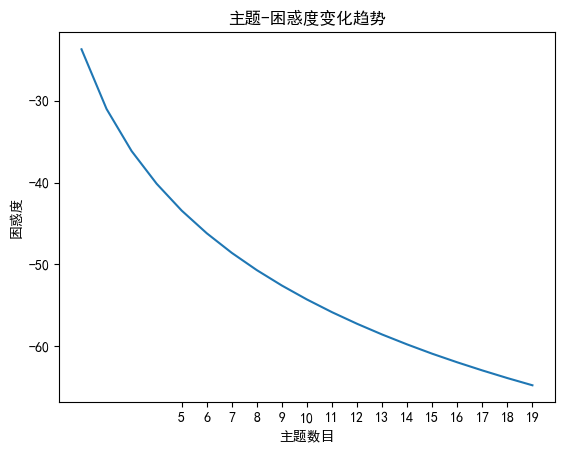

In [27]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## 主题困惑度计算

topic_num = range(1,20)
perplexitys_topics = [cal_perplexity(num,cn_corpus_tfidf,cnDict) for num in topic_num]

my_x_ticks = np.arange(5, 50, 1)
plt.xticks(my_x_ticks)

plt.plot(topic_num, perplexitys_topics)
plt.xlabel('主题数目')
plt.ylabel('困惑度')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('主题-困惑度变化趋势')
plt.show()